OpenClassrooms
Project 4, Data Scientist
Author : Oumeima EL GHARBI
Date : August 2022

Un notebook pour chaque prédiction (émissions de CO2 et consommation totale d’énergie) des différents tests de modèles mis au propre, dans lequel vous identifierez clairement le modèle final choisi.


L’objectif est de te passer des relevés de consommation annuels futurs (attention à la fuite de données). Nous ferons de toute façon pour tout nouveau bâtiment un premier relevé de référence la première année, donc rien ne t'interdit d’en déduire des variables structurelles aux bâtiments, par exemple la nature et proportions des sources d’énergie utilisées..

Fais bien attention au traitement des différentes variables, à la fois pour trouver de nouvelles informations (peut-on déduire des choses intéressantes d’une simple adresse ?) et optimiser les performances en appliquant des transformations simples aux variables (normalisation, passage au log, etc.).

Mets en place une évaluation rigoureuse des performances de la régression, et optimise les hyperparamètres et le choix d’algorithmes de ML à l’aide d’une validation croisée.



Tester les modèles suivants : **regression linéaire (avec différentes régularisation : Ridge, Lasso, Elastic), Random Forest, XGboost**
Penser à comparer les performances des différents modèles : utiliser la **MAE** ( Mean Absolute Error)
Penser également à optimiser les hyper paramètres de chaque modèle via **GridSearch**


Evaluate :

https://cloud.google.com/automl-tables/docs/evaluate?hl=fr


KFOLD

Entrée : données X (dimension nxp), étiquettes y (dimension n), nombre de folds k

Couper [0, 1, ..., n-1] en k parties de taille (n/k). (La dernière partie sera un peu plus petite si n n'est pas un multiple de k)

for i=0 to (k-1):
    Former le jeu de test (X_test, y_test) en restreignant X et y aux indices contenus dans la i-ième partie.
    Former le jeu d'entraînement (X_train, y_train) en restreignant X et y aux autres indices.
    Entraîner l'algorithme sur le jeu d'entraînement
    Utiliser le modèle ainsi obtenu pour prédire sur le jeu de test
        Calculer l'erreur du modèle en comparant les étiquettes prédites aux vraies étiquettes contenues dans y_test

Sortie : la valeur moyenne des erreurs calculées sur les k folds.

In [2]:
# 1 modele de Regression (RL classsque / Elastic / ridig / laso
# Random Forest
# XGBOOST

# var à rpedire tottal GHE Emssion last one to predict
# cette var deped de la consommation des bateimenst (1) prediction sur elec, steam, naturalgas et un autre energie (2) et reutiliser pour predire

### Introduction

#### Importing libraries

In [3]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [4]:
from functions import *

In [5]:
import os, warnings
# warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")

In [6]:
# Set random integer (seed) - 891
from random import randrange
#seed = randrange(1000)
seed = 1
print("Seed value: ", seed)

Seed value:  1


#### Loading dataset

In [7]:
columns_to_categorize = ["BuildingType", "PrimaryPropertyType", "Neighborhood", "ZipCode", "CouncilDistrictCode", "LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]
#  "Neighborhood",
category_types = {column: 'category' for column in columns_to_categorize}
print("This dictionary will be used when reading the csv file to assign a type to categorical features :", category_types)

This dictionary will be used when reading the csv file to assign a type to categorical features : {'BuildingType': 'category', 'PrimaryPropertyType': 'category', 'Neighborhood': 'category', 'ZipCode': 'category', 'CouncilDistrictCode': 'category', 'LargestPropertyUseType': 'category', 'SecondLargestPropertyUseType': 'category', 'ThirdLargestPropertyUseType': 'category'}


In [8]:
path = "./dataset/cleaned/"
filename = "2016_Building_Energy_Prediction.csv"
dataset_path = "{}{}".format(path, filename)
# we assign the categorical features with a categotical type
data = pd.read_csv(dataset_path, dtype=category_types, sep=",")

In [12]:
data.shape

(3157, 37)

In [13]:
data.dtypes

OSEBuildingID                             int64
BuildingType                           category
PrimaryPropertyType                    category
ZipCode                                category
CouncilDistrictCode                    category
Neighborhood                           category
YearBuilt                                 int64
NumberofBuildings                       float64
NumberofFloors                            int64
PropertyGFATotal                          int64
PropertyGFAParking                        int64
PropertyGFABuilding(s)                    int64
LargestPropertyUseType                 category
LargestPropertyUseTypeGFA               float64
SecondLargestPropertyUseType           category
SecondLargestPropertyUseTypeGFA         float64
ThirdLargestPropertyUseType            category
ThirdLargestPropertyUseTypeGFA          float64
ENERGYSTARScore                         float64
SiteEnergyUse(kBtu)                     float64
SteamUse(kBtu)                          

In [14]:
# predict : Electricity
# train / test
# standardisation = retirer la moyen et div par ecart type (scaling : les var qn sur emem echelle
# var categ : encoding (one hot encoder)

# la fin Feature engineriing

# 2) entrainer le smodels
# perf
# temps de calcul
# graph pour montrer la perf de chaque modele(barplot)
# obj : finir exploration / finir feature engineering
# obj un premier noteboook propre (try max)

In [15]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'ZipCode',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'Log-NumberofBuildings',
       'Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFAParking',
       'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA',
       'Log-SecondLargestPropertyUseTypeGFA',
       'Log-ThirdLargestPropertyUseTypeGFA', 'Log-SiteEnergyUse(kBtu)',
       'Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)',
       'Log-TotalGHGEmissions'],

### TRYOUT

In [ ]:
data['Steam_ratio'] = data['SteamUse(kBtu)'] / data['Log-SiteEnergyUse(kBtu)']
data['Electricity_ratio'] = data['Electricity(kBtu)'] / data['Log-SiteEnergyUse(kBtu)']
data['NaturalGas_ratio'] = data['NaturalGas(kBtu)'] / data['Log-SiteEnergyUse(kBtu)']
#data['Others_ratio'] = data['Others(kBtu)'] / data['Log-SiteEnergyUse(kBtu)']

In [16]:
features_for_prediction = ["YearBuilt", "BuildingType", "PrimaryPropertyType", "Neighborhood", "Log-NumberofBuildings", "Log-NumberofFloors", "Log-PropertyGFATotal", "Log-PropertyGFAParking", "Log-SecondLargestPropertyUseTypeGFA", "Log-ThirdLargestPropertyUseTypeGFA", "Electricity_ratio"]

#features_for_prediction = ["YearBuilt", "NumberofBuildings", "NumberofFloors", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA",
   #                        "BuildingType","PrimaryPropertyType", "Neighborhood", "LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]

variable_to_predict = "Electricity_ratio"

features_for_prediction.append(variable_to_predict)
print(features_for_prediction)


['YearBuilt', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-PropertyGFAParking', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA', 'Log-ThirdLargestPropertyUseTypeGFA', 'Log-Electricity(kBtu)']


In [17]:
data = data[features_for_prediction]

data

,YearBuilt,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-PropertyGFAParking,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,Log-Electricity(kBtu)
0,1978,Multifamily LR (1-4),Low-Rise Multifamily,central,Multifamily Housing,1.386294,9.939819,9.939819,0.000000,9.777301,0.000000,0.000000,13.612540
1,1928,NonResidential,Warehouse,greater duwamish,Non-Refrigerated Warehouse,1.098612,10.164158,10.164158,0.000000,9.557541,9.076352,8.026497,14.012813
2,1925,Multifamily LR (1-4),Low-Rise Multifamily,greater duwamish,Multifamily Housing,1.386294,10.131459,10.131459,0.000000,10.131459,0.000000,0.000000,12.624928
3,1971,Multifamily HR (10+),High-Rise Multifamily,greater duwamish,Multifamily Housing,2.772589,11.210455,11.210455,0.000000,11.288694,0.000000,0.000000,14.583001
4,2001,Multifamily LR (1-4),Low-Rise Multifamily,greater duwamish,Multifamily Housing,1.386294,10.501884,10.287184,8.858084,10.132772,8.343078,0.000000,13.397146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2001,NonResidential,Mixed Use Property,lake union,Multifamily Housing,1.386294,10.641321,10.392129,9.129889,9.566195,9.555985,9.177920,14.707138
3153,1907,Multifamily LR (1-4),Low-Rise Multifamily,lake union,Multifamily Housing,1.609438,10.509469,10.509469,0.000000,10.509469,0.000000,0.000000,13.156997
3154,2001,NonResidential,Small- and Mid-Sized Office,lake union,Office,1.791759,10.426469,10.230306,8.701346,9.674640,9.078294,7.313887,14.071242
3155,1911,NonResidential,Retail Store,lake union,Retail Store,1.098612,9.929009,9.929009,0.000000,9.225820,8.987322,0.000000,12.487428


## I) Feature Engineering : preparing the vectors and matrices


#### 1) Separating training data and target vector

In [18]:
# we create the data matrix / we only take the features
X = data[data.columns[:-1]]

# we create the target vector
y = data[variable_to_predict].values # numpy array not a DataFrame anymore

print("Shape of X :", X.shape)
print("Shape of y :", y.shape)

Shape of X : (3157, 12)
Shape of y : (3157,)


#### 2) Separation train and test dataset


In [20]:
print("We have to separate the train / test sets before normalising the dataset.")

We have to separate the train / test sets before normalising the dataset.


In [21]:
# We create a training set and a test set (the test set contains 30% of the dataset)
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=seed)

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=seed)

In [22]:
X_train.shape

(2209, 12)

In [23]:
X_test.shape

(948, 12)

In [ ]:
train.shape

In [ ]:
test.shape

#### 3) Normalization

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [25]:
print("We separate categorical variables from numerical variables.")

We separate categorical variables from numerical variables.


In [26]:
X.select_dtypes(['category','object']) # we don't have 'object' here but it is just in case.

categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(include='number').columns.drop("YearBuilt") ###
#numerical_columns = X.select_dtypes(include='number').columns
print("We won't normalise the year so we drop it from numerical_columns.")

print("Shape of categorical variables : ", categorical_columns.shape)
print("Shape of numerical variables :", numerical_columns.shape)

We won't normalise the year so we drop it from numerical_columns.
Shape of categorical variables :  (4,)
Shape of numerical variables : (7,)


##### 1) Data Standardisation

We have to standardize the variables before learning a **Ridge Regression**.
Standardizing means that each variable will have a **standard deviation** equal to 1.

In [27]:
print("Numerical variables standardization")
print("We have :", numerical_columns.shape[0], "numerical features to standardize.",end="\n\n")

print(numerical_columns)

Numerical variables standardization
We have : 7 numerical features to standardize.

Index(['Log-NumberofFloors', 'Log-PropertyGFATotal',
       'Log-PropertyGFABuilding(s)', 'Log-PropertyGFAParking',
       'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA',
       'Log-ThirdLargestPropertyUseTypeGFA'],
      dtype='object')


In [28]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scale = StandardScaler().fit(X_train[numerical_columns])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[numerical_columns] = std_scale.transform(X_train[numerical_columns])
X_test_std[numerical_columns] = std_scale.transform(X_test[numerical_columns])

print("Before")
display(X_train)
print("After")
display(X_train_std)

Before


,YearBuilt,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-PropertyGFAParking,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA
1866,1984,Multifamily LR (1-4),Low-Rise Multifamily,northeast,Multifamily Housing,1.609438,10.965730,10.965730,0.0,10.997807,0.000000,0.000000
635,1965,NonResidential,Supermarket / Grocery Store,northeast,Supermarket/Grocery Store,0.693147,10.398885,10.398885,0.0,10.464331,0.000000,0.000000
720,2009,Multifamily MR (5-9),Mid-Rise Multifamily,central,Multifamily Housing,2.079442,11.867708,11.867708,0.0,11.458480,10.391024,8.493310
254,1962,Multifamily LR (1-4),Low-Rise Multifamily,southwest,Multifamily Housing,1.386294,10.042510,10.042510,0.0,9.750628,8.668884,0.000000
2227,1971,NonResidential,Refrigerated Warehouse,greater duwamish,Refrigerated Warehouse,0.693147,11.243149,11.243149,0.0,11.244876,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1988,Multifamily MR (5-9),Mid-Rise Multifamily,downtown,Multifamily Housing,1.791759,11.884620,11.884620,0.0,10.899864,9.446282,8.615408
905,1973,Multifamily MR (5-9),Mid-Rise Multifamily,magnolia / queen anne,Multifamily Housing,1.791759,10.418315,10.418315,0.0,10.418315,0.000000,0.000000
1096,2013,Multifamily MR (5-9),Mid-Rise Multifamily,downtown,Multifamily Housing,2.197225,10.891336,10.891336,0.0,11.396403,10.130663,8.486940
235,1910,Multifamily LR (1-4),Low-Rise Multifamily,east,Multifamily Housing,1.386294,10.215704,10.215704,0.0,10.215704,0.000000,0.000000


After


,YearBuilt,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-PropertyGFAParking,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA
1866,1984,Multifamily LR (1-4),Low-Rise Multifamily,northeast,Multifamily Housing,0.089427,0.049873,0.117626,-0.414469,0.286702,-0.926010,-0.438704
635,1965,NonResidential,Supermarket / Grocery Store,northeast,Supermarket/Grocery Store,-1.510458,-0.611899,-0.572959,-0.414469,-0.345137,-0.926010,-0.438704
720,2009,Multifamily MR (5-9),Mid-Rise Multifamily,central,Multifamily Housing,0.910074,1.102901,1.216501,-0.414469,0.832315,1.236396,2.168713
254,1962,Multifamily LR (1-4),Low-Rise Multifamily,southwest,Multifamily Housing,-0.300192,-1.027954,-1.007129,-0.414469,-1.190435,0.878013,-0.438704
2227,1971,NonResidential,Refrigerated Warehouse,greater duwamish,Refrigerated Warehouse,-1.510458,0.373750,0.455604,-0.414469,0.579326,-0.926010,-0.438704
...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1988,Multifamily MR (5-9),Mid-Rise Multifamily,downtown,Multifamily Housing,0.407768,1.122645,1.237106,-0.414469,0.170700,1.039792,2.206197
905,1973,Multifamily MR (5-9),Mid-Rise Multifamily,magnolia / queen anne,Multifamily Housing,0.407768,-0.589215,-0.549287,-0.414469,-0.399638,-0.926010,-0.438704
1096,2013,Multifamily MR (5-9),Mid-Rise Multifamily,downtown,Multifamily Housing,1.115728,-0.036980,0.026992,-0.414469,0.758792,1.182214,2.166757
235,1910,Multifamily LR (1-4),Low-Rise Multifamily,east,Multifamily Housing,-0.300192,-0.825757,-0.796128,-0.414469,-0.639607,-0.926010,-0.438704


We can check that the numerical variables have a Standard Normal distribution.


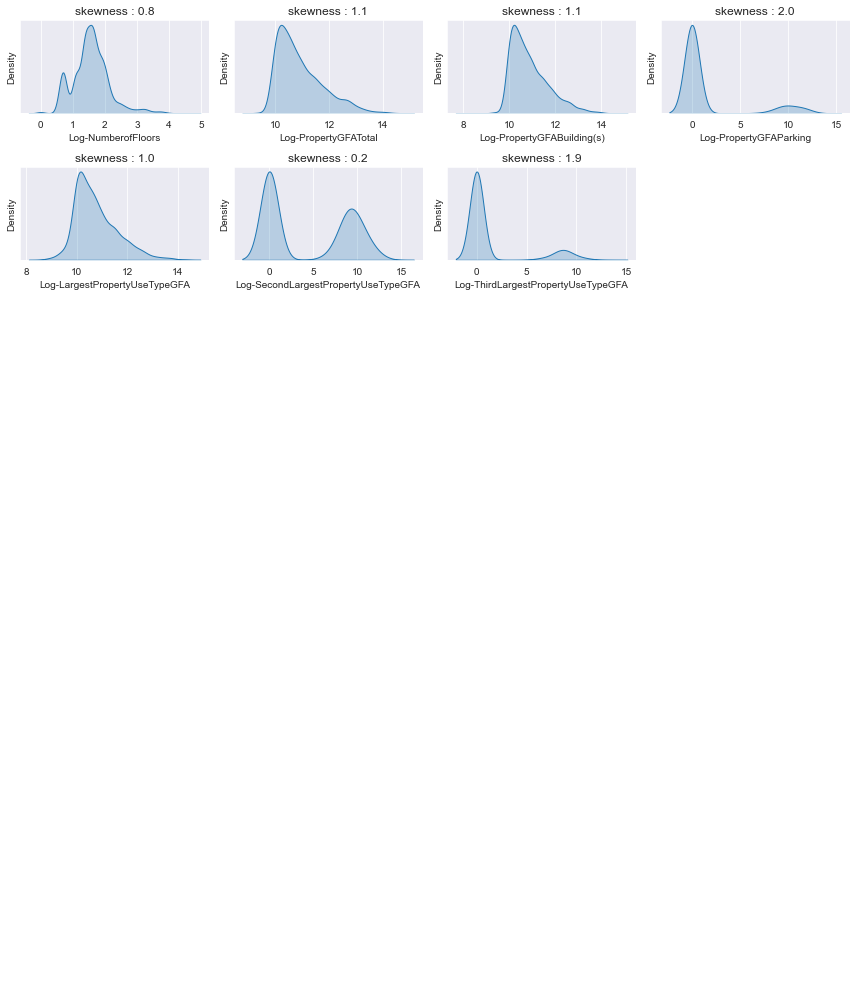

In [29]:
print("We can check that the numerical variables have a Standard Normal distribution.")
densite(X_train[numerical_columns])

##### 2) Feature Encoding : One Hot Encoder

In [30]:
print("Categorical variables featuring")

print("We have :", categorical_columns.shape[0], "categorical features to encode.", end="\n\n")
print(categorical_columns)

Categorical variables featuring
We have : 4 categorical features to encode.

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType'],
      dtype='object')


In [31]:
X.dtypes # we check that we have categories

YearBuilt                                 int64
BuildingType                           category
PrimaryPropertyType                    category
Neighborhood                           category
LargestPropertyUseType                 category
Log-NumberofFloors                      float64
Log-PropertyGFATotal                    float64
Log-PropertyGFABuilding(s)              float64
Log-PropertyGFAParking                  float64
Log-LargestPropertyUseTypeGFA           float64
Log-SecondLargestPropertyUseTypeGFA     float64
Log-ThirdLargestPropertyUseTypeGFA      float64
dtype: object

In [32]:
X[categorical_columns].nunique()

BuildingType               8
PrimaryPropertyType       23
Neighborhood              13
LargestPropertyUseType    55
dtype: int64

In [33]:
X_train_std[categorical_columns]

,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
1866,Multifamily LR (1-4),Low-Rise Multifamily,northeast,Multifamily Housing
635,NonResidential,Supermarket / Grocery Store,northeast,Supermarket/Grocery Store
720,Multifamily MR (5-9),Mid-Rise Multifamily,central,Multifamily Housing
254,Multifamily LR (1-4),Low-Rise Multifamily,southwest,Multifamily Housing
2227,NonResidential,Refrigerated Warehouse,greater duwamish,Refrigerated Warehouse
...,...,...,...,...
2763,Multifamily MR (5-9),Mid-Rise Multifamily,downtown,Multifamily Housing
905,Multifamily MR (5-9),Mid-Rise Multifamily,magnolia / queen anne,Multifamily Housing
1096,Multifamily MR (5-9),Mid-Rise Multifamily,downtown,Multifamily Housing
235,Multifamily LR (1-4),Low-Rise Multifamily,east,Multifamily Housing


##### Encoding the categorical features of the train set


In [34]:
print("Now, we can use the One Hot Encoder.")
print("With the one hot encoder, we will get :", sum([X[categorical_columns].nunique()[i] for i in range(len(categorical_columns))]), "columns to encodes the categorical features.")

Now, we can use the One Hot Encoder.
With the one hot encoder, we will get : 99 columns to encodes the categorical features.


In [35]:
# 0) creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # if sparse=True (by default), we need to add .toarray() to encoded_categorical_data

# 1) Fit the encoder on the training set
one_hot_encoder.fit(X_train_std[categorical_columns])

# 2) we get the encoded numpy array
encoded_categorical_data = one_hot_encoder.transform(X_train_std[categorical_columns])

# 3) we make a list of the columns names
encoded_categorical_data_names = one_hot_encoder.get_feature_names_out().tolist()
print("We have indeed :", len(encoded_categorical_data_names), "labels after encoding the categorical variables.")

# 4) we recreate a dataframe with the column names and the numpy array
X_train_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                               data=encoded_categorical_data,
                               index=X_train_std.index)
display(X_train_encoded.sort_index())

We have indeed : 97 labels after encoding the categorical variables.


,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,...,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3149,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# 5) Concatenate the two dataframes for the training set

print("We need to add YearBuilt to the list of features.")
numerical_columns.tolist()
features_to_merge = numerical_columns.tolist().copy()
features_to_merge.append("YearBuilt") ###
print(features_to_merge, end="\n\n")

print("ASK JEREMY : merge based on index ok ? or should I put back OSEBuildingID ??")
X_train_std_encoded = pd.merge(X_train_std[features_to_merge].sort_index(), X_train_encoded.sort_index(), left_index=True, right_index=True)
display(X_train_std_encoded.sort_index())

We need to add YearBuilt to the list of features.
['Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-PropertyGFAParking', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA', 'Log-ThirdLargestPropertyUseTypeGFA', 'YearBuilt']

ASK JEREMY : merge based on index ok ? or should I put back OSEBuildingID ??


,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-PropertyGFAParking,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,BuildingType_Campus,BuildingType_Multifamily HR (10+),...,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
0,-0.300192,-1.147842,-1.132236,-0.414469,-1.158844,-0.926010,-0.438704,1978,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.802498,-0.885935,-0.858926,-0.414469,-1.419124,0.962808,2.025403,1928,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.300192,-0.924109,-0.898762,-0.414469,-0.739385,-0.926010,-0.438704,1925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.089427,-0.411789,-0.364136,-0.414469,-0.219641,-0.926010,-0.438704,1996,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.300192,0.908369,1.013500,-0.414469,0.877190,1.081208,-0.438704,1977,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,0.089427,-0.388030,-0.339342,-0.414469,-0.195537,-0.926010,-0.438704,1925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,-0.300192,-0.679666,-0.643676,-0.414469,-0.491399,-0.926010,-0.438704,1920,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3149,-0.300192,-1.044066,-1.023942,-0.414469,-0.861080,-0.926010,-0.438704,1946,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3150,0.407768,-0.060872,0.002059,-0.414469,-0.023526,-0.926010,-0.438704,1925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Encoding the categorical features of the test set

In [37]:
# 5) One Hot Encoding on the testing set

# 5.1) we get the encoded numpy array
TEST_encoded_categorical_data = one_hot_encoder.transform(X_test_std[categorical_columns])

print("ASK JEREMY for this method below ???")
# 5.2) we recreate a dataframe with the column names and the numpy array
X_test_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                               data=TEST_encoded_categorical_data,
                               index=X_test_std.index)
display(X_test_encoded.sort_index())

print("ASK JEREMY : merge based on index ok ? or should I put back OSEBuildingID ??")
X_test_std_encoded = pd.merge(X_test_std[features_to_merge].sort_index(), X_test_encoded.sort_index(), left_index=True, right_index=True)
display(X_test_std_encoded.sort_index())

ASK JEREMY for this method below ???


,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,...,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3152,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3153,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3154,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ASK JEREMY : merge based on index ok ? or should I put back OSEBuildingID ??


,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-PropertyGFAParking,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,BuildingType_Campus,BuildingType_Multifamily HR (10+),...,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
3,2.120340,0.335580,0.415773,-0.414469,0.631223,-0.926010,-0.438704,1971,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.300192,-0.491651,-0.709044,2.006790,-0.737830,0.810212,-0.438704,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.802498,1.054129,1.165606,-0.414469,1.043939,-0.926010,-0.438704,1972,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.757792,0.545220,0.634540,-0.414469,0.751236,-0.926010,-0.438704,1927,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,-0.802498,-0.169055,-0.829984,2.310842,-0.543423,0.884422,-0.438704,1991,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,-0.802498,-0.576241,-0.535748,-0.414469,-1.086397,1.055612,1.794110,1927,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3152,-0.300192,-0.328863,-0.581190,2.081085,-1.408874,1.062621,2.378886,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3153,0.089427,-0.482796,-0.438235,-0.414469,-0.291677,-0.926010,-0.438704,1907,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3154,0.407768,-0.579696,-0.778338,1.963948,-1.280433,0.963212,1.806634,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Save
#X_train_std_encoded.to_csv("dataset/cleaned/electricity/X_train.csv", index=False)
#X_test_std_encoded.to_csv("dataset/cleaned/electricity/X_test.csv", index=False)
#y_train.to_csv("dataset/cleaned/electricity/y_train.csv", index=False)
#y_test.to_csv("dataset/cleaned/electricity/y_test.csv", index=False)

## II) Modelisation

In [40]:
print("We can start now the modelling to predict the feature wanted.")

display(X_train_std_encoded)
display(X_test_std_encoded)
print(y_train.shape, y_test.shape)

We can start now the modelling to predict the feature wanted.


,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-PropertyGFAParking,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,BuildingType_Campus,BuildingType_Multifamily HR (10+),...,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
0,-0.300192,-1.147842,-1.132236,-0.414469,-1.158844,-0.926010,-0.438704,1978,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.802498,-0.885935,-0.858926,-0.414469,-1.419124,0.962808,2.025403,1928,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.300192,-0.924109,-0.898762,-0.414469,-0.739385,-0.926010,-0.438704,1925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.089427,-0.411789,-0.364136,-0.414469,-0.219641,-0.926010,-0.438704,1996,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.300192,0.908369,1.013500,-0.414469,0.877190,1.081208,-0.438704,1977,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,0.089427,-0.388030,-0.339342,-0.414469,-0.195537,-0.926010,-0.438704,1925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,-0.300192,-0.679666,-0.643676,-0.414469,-0.491399,-0.926010,-0.438704,1920,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3149,-0.300192,-1.044066,-1.023942,-0.414469,-0.861080,-0.926010,-0.438704,1946,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3150,0.407768,-0.060872,0.002059,-0.414469,-0.023526,-0.926010,-0.438704,1925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-PropertyGFAParking,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,BuildingType_Campus,BuildingType_Multifamily HR (10+),...,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
3,2.120340,0.335580,0.415773,-0.414469,0.631223,-0.926010,-0.438704,1971,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.300192,-0.491651,-0.709044,2.006790,-0.737830,0.810212,-0.438704,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.802498,1.054129,1.165606,-0.414469,1.043939,-0.926010,-0.438704,1972,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.757792,0.545220,0.634540,-0.414469,0.751236,-0.926010,-0.438704,1927,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,-0.802498,-0.169055,-0.829984,2.310842,-0.543423,0.884422,-0.438704,1991,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,-0.802498,-0.576241,-0.535748,-0.414469,-1.086397,1.055612,1.794110,1927,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3152,-0.300192,-0.328863,-0.581190,2.081085,-1.408874,1.062621,2.378886,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3153,0.089427,-0.482796,-0.438235,-0.414469,-0.291677,-0.926010,-0.438704,1907,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3154,0.407768,-0.579696,-0.778338,1.963948,-1.280433,0.963212,1.806634,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(2209,) (948,)


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [42]:
print("We rename X_train_std_encoded to X_train, the same for X_test.")
X_train = X_train_std_encoded.copy()
X_test = X_test_std_encoded.copy()

X_train
X_test

We rename X_train_std_encoded to X_train, the same for X_test.


,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-PropertyGFAParking,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,BuildingType_Campus,BuildingType_Multifamily HR (10+),...,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
3,2.120340,0.335580,0.415773,-0.414469,0.631223,-0.926010,-0.438704,1971,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.300192,-0.491651,-0.709044,2.006790,-0.737830,0.810212,-0.438704,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.802498,1.054129,1.165606,-0.414469,1.043939,-0.926010,-0.438704,1972,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.757792,0.545220,0.634540,-0.414469,0.751236,-0.926010,-0.438704,1927,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,-0.802498,-0.169055,-0.829984,2.310842,-0.543423,0.884422,-0.438704,1991,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,-0.802498,-0.576241,-0.535748,-0.414469,-1.086397,1.055612,1.794110,1927,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3152,-0.300192,-0.328863,-0.581190,2.081085,-1.408874,1.062621,2.378886,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3153,0.089427,-0.482796,-0.438235,-0.414469,-0.291677,-0.926010,-0.438704,1907,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3154,0.407768,-0.579696,-0.778338,1.963948,-1.280433,0.963212,1.806634,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X_train.shape

(2209, 105)

In [44]:
X_test.shape

(948, 105)

In [53]:
X_train

,BuildingType_Campus,BuildingType_Multifamily hr (10+),BuildingType_Multifamily lr (1-4),BuildingType_Multifamily mr (5-9),BuildingType_Nonresidential,BuildingType_Nonresidential cos,BuildingType_Sps-district k-12,PrimaryPropertyType_Distribution center,PrimaryPropertyType_High-rise multifamily,PrimaryPropertyType_Hospital,...,Neighborhood_Southeast,Neighborhood_Southwest,ZipCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.482826,0.020691,-0.033194,-0.790841,-0.882240,-0.418726,-0.942943,-0.437746
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.418635,0.200127,-0.033194,-0.288833,0.408582,-0.418726,0.735179,-0.437746
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.747962,0.648719,-0.033194,0.100555,-0.899256,-0.418726,0.953456,-0.437746
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.429799,0.499189,-0.033194,0.100555,-0.940794,-0.418726,0.826133,-0.437746
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.130534,0.080503,-0.033194,2.837806,2.445734,-0.418726,-0.942943,-0.437746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.482826,-0.218558,-0.033194,-1.498382,-0.895358,-0.418726,0.928042,2.138091
2219,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.005582,1.037499,-0.033194,0.100555,-0.301505,-0.418726,0.906033,1.709350
2220,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.588880,0.080503,1.765236,-0.790841,-0.776884,-0.418726,0.955852,-0.437746
2221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.854016,-1.743770,-0.033194,1.476421,0.969014,-0.418726,1.211596,2.448165


In [ ]:
# Sauvegarde des jeux de données
train_preprocess.to_csv('dataset/cleaned/train_energy.csv', encoding='utf-8', index=False)
test_preprocess.to_csv('output/test_energy.csv', encoding='utf-8', index=False)